### Perfect Numbers
6 = 1 + 2 + 3

In [11]:
def test_perfect(number: int) -> bool:
    divisors = []
    
    for i in range(1, number):
        if number%i == 0:
            divisors.append(i)
            
    return sum(divisors) == number

In [16]:
test_perfect(3)

False

In [19]:
perfect_numbers = []

for number in range(2, 10001):
    if test_perfect(number):
        perfect_numbers.append(number)

print(perfect_numbers)

[6, 28, 496, 8128]


### Pythagorean triplets
#### examples:
$
5^2 = 3^2 + 4^2 \\
13^2 = 5^2 + 12^2 \\
$

#### Euclid's formula for finding triplets
$
a = m^2 - n^2 \\
b = 2mn \\
c = m^2 + n^2 \\
$
constraints
$
m > n \\
m, n \in \mathbb{Z} \\
$

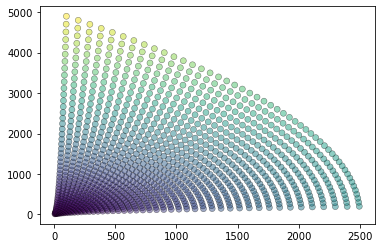

In [30]:
import numpy as np
import matplotlib.pyplot as plt

numberrange = np.arange(2, 51)
a = []
b = []
c = []

for m in numberrange:
    for n in range(numberrange[0], m):
        a.append( m**2 - n**2 )
        b.append( 2*m*n )
        c.append( m**2 + n**2 )
    
plt.scatter(a, b, c=c, alpha=.5, linewidths=.5, edgecolors='k')

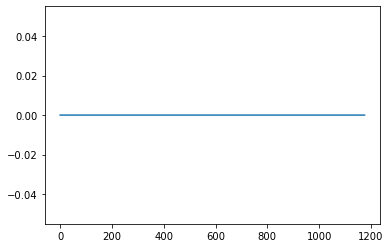

In [32]:
pythcheck = np.array(a)**2 + np.array(b)**2 - np.array(c)**2
plt.plot(pythcheck)
plt.show()

#### Fermat's teorem

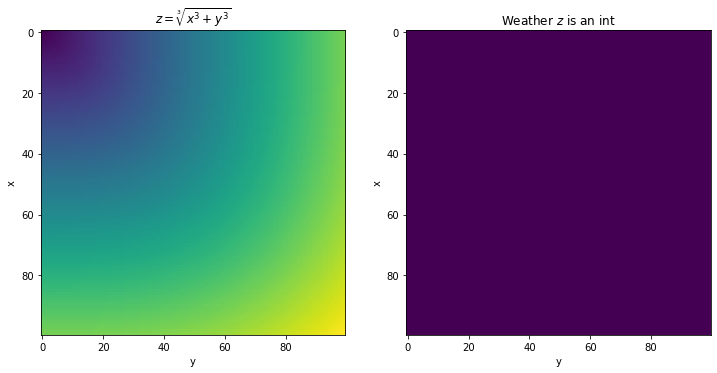

In [44]:
import numpy as np
import matplotlib.pyplot as plt

ints = np.arange(1, 101)

Z = np.zeros((len(ints), len(ints)))

for x in ints:
    for y in ints:
        Z[x-1, y-1] = (x**3 + y**3)**(1/3)
        
zints = Z%1 == 0

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(Z)
ax[0].set_xlabel('y')
ax[0].set_ylabel('x')
ax[0].set_title('$z = \sqrt[3]{x^3 + y^3}$')

ax[1].imshow(zints)
ax[1].set_xlabel('y')
ax[1].set_ylabel('x')
ax[1].set_title('Weather $z$ is an int')

plt.show()

#### Smooth numbers

k-smooth number:
An integer whose largest prime factor is <= k.

$
30 = 2\times3\times5 \\
\text{30 is 5-smooth} \\
\quad\text{is 7-smooth} \\
\quad\text{is 11-smooth} \\
\quad\text{is 13-smooth} \\
$

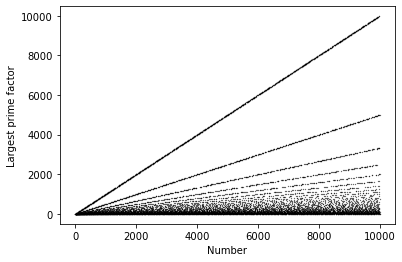

In [13]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

maxN = 10000
largestPrimeFact = np.zeros(maxN+1, dtype=int)


for i in range(2, maxN+1):
    largestPrimeFact[i] = np.max(sym.primefactors(i))
    
largestPrimeFact = largestPrimeFact[largestPrimeFact != 0] # removing zeroes

plt.plot(largestPrimeFact, 'k.', markersize=.5)
plt.ylabel('Largest prime factor')
plt.xlabel('Number')
plt.show()

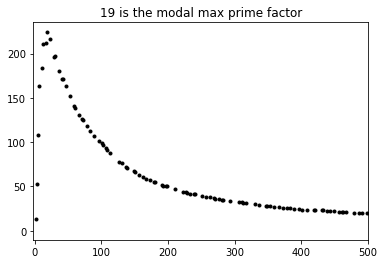

In [28]:
# count number of occurences of max prime factors

uniqueMaxPrimes = np.unique(largestPrimeFact)

counts = np.zeros(len(uniqueMaxPrimes), dtype=int)

for i, u in enumerate(uniqueMaxPrimes):
    counts[i] = np.sum(largestPrimeFact==u)

plt.plot(uniqueMaxPrimes, counts, 'k.')
plt.xlim([-2, 500])
plt.title('%s is the modal max prime factor' %uniqueMaxPrimes[np.argmax(counts)])
plt.show()